In [1037]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt

In [1171]:
customer = pd.read_csv('Customer Acqusition.csv')
repayment = pd.read_csv('Repayment.csv')
spend = pd.read_csv('spend.csv')

In [1173]:
repayment.head(5)

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [1175]:
# it gives no of rows and columns
customer.shape
customer = customer.drop(customer.columns[0],axis=1)

In [1177]:
# it gives each coulmn type
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  100 non-null    object 
 1   Age       100 non-null    int64  
 2   City      100 non-null    object 
 3   Product   100 non-null    object 
 4   Limit     100 non-null    float64
 5   Company   100 non-null    object 
 6   Segment   100 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.6+ KB


In [1179]:
spend.shape

(1500, 5)

In [1181]:
spend.info()
spend = spend.drop(spend.columns[0],axis=1)
spend

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl No:    1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Type      1500 non-null   object 
 4   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


,Customer,Month,Type,Amount
0,A1,12-Jan-04,JEWELLERY,485470.80
1,A1,3-Jan-04,PETRO,410556.13
2,A1,15-Jan-04,CLOTHES,23740.46
3,A1,25-Jan-04,FOOD,484342.47
4,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...
1495,A67,4-Feb-06,BUS TICKET,356872.73
1496,A68,25-Mar-06,BUS TICKET,204971.10
1497,A69,31-Mar-06,BUS TICKET,50449.44
1498,A70,23-Mar-06,BUS TICKET,80593.94


In [1183]:
# to convert month to reg date format
spend.Month = pd.to_datetime(spend.Month)

C:\Users\saipr\AppData\Local\Temp\ipykernel_25768\3567873961.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  spend.Month = pd.to_datetime(spend.Month)


In [1185]:
repayment.shape

(1523, 5)

In [1187]:
repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SL No:      1499 non-null   float64
 1   Customer    1500 non-null   object 
 2   Month       1500 non-null   object 
 3   Amount      1500 non-null   float64
 4   Unnamed: 4  0 non-null      float64
dtypes: float64(3), object(2)
memory usage: 59.6+ KB


In [1189]:
repayment.Month = pd.to_datetime(repayment.Month)

C:\Users\saipr\AppData\Local\Temp\ipykernel_25768\675148317.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  repayment.Month = pd.to_datetime(repayment.Month)


In [1191]:
customer.isnull().sum()

Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [1193]:
spend.isnull().sum()

Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [1195]:
# removing the un-named column
repayment = repayment.drop(repayment.columns[0],axis=1)
repayment

,Customer,Month,Amount,Unnamed: 4
0,A1,2004-01-12,495414.75,NaN
1,A1,2004-01-03,245899.02,NaN
2,A1,2004-01-15,259490.06,NaN
3,A1,2004-01-25,437555.12,NaN
4,A1,2005-01-17,165972.88,NaN
...,...,...,...,...
1518,NaN,NaT,NaN,NaN
1519,NaN,NaT,NaN,NaN
1520,NaN,NaT,NaN,NaN
1521,NaN,NaT,NaN,NaN


In [1197]:
repayment = repayment.drop(repayment.columns[3],axis=1)
repayment.isnull().sum()

Customer    23
Month       23
Amount      23
dtype: int64

In [1199]:
# drop the null values
repayment = repayment.dropna()

In [1201]:
repayment

,Customer,Month,Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02
2,A1,2004-01-15,259490.06
3,A1,2004-01-25,437555.12
4,A1,2005-01-17,165972.88
...,...,...,...
1495,A67,2005-05-09,55638.77
1496,A68,2006-05-10,319836.49
1497,A69,2006-07-11,247628.45
1498,A70,2005-08-12,454016.51


In [1203]:
repayment.isnull().sum()

Customer    0
Month       0
Amount      0
dtype: int64

In [1205]:
repayment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Customer  1500 non-null   object        
 1   Month     1500 non-null   datetime64[ns]
 2   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 46.9+ KB


In [1207]:
##  For Q1

In [1209]:
#  In case age is less than 18, replace it with mean of age values

In [1211]:
(customer.Age<18).sum()

6

In [1213]:
mean = customer['Age'].mean()
customer['Age'] = customer['Age'].apply(lambda x: round(mean) if x<18 else x)
customer

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...
95,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [1216]:
## b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
## (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [1218]:
new1 = pd.merge(left=customer, right=spend, on='Customer')
new1.Amount = np.where(new1.Amount>new1.Limit, 0.5*new1.Limit, new1.Amount)
new1 = new1.rename(columns={'Amount':'Spend_Amount'})
new1

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Spend_Amount
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...
1495,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66
1496,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,5000.00
1497,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,5000.50
1498,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,5001.00


In [1220]:
(new1.Spend_Amount>new1.Limit).sum()

0

In [1222]:
 ## Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [1224]:
new2 = pd.merge(left=customer, right=repayment, on='Customer')
new2.Amount = np.where(new2.Amount>new2.Limit, new2.Limit, new2.Amount)
new2 = new2.rename(columns={'Amount':'Repayment_Amount'})
new2.head(5)

,Customer,Age,City,Product,Limit,Company,Segment,Month,Repayment_Amount
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88


In [1226]:
## 2. From the above dataset create the following summaries:

In [1228]:
## a. How many distinct customers exist?
customer.Customer.nunique()
customer['Customer'].nunique()

100

In [1230]:
#3 ## a. How many distinct categories exist?
customer['Segment'].nunique()
customer.Segment.drop_duplicates()

0    Self Employed
1     Salaried_MNC
2     Salaried_Pvt
3             Govt
4    Normal Salary
Name: Segment, dtype: object

In [1232]:
customer.Product.nunique()
customer.Product.drop_duplicates()

0        Gold
1      Silver
2    Platimum
Name: Product, dtype: object

In [1234]:
## c. What is the average monthly spend by customers?
avg = new1.groupby([new1.Month.dt.year,new1.Month.dt.month_name()])[['Spend_Amount']].mean()
avg = avg.rename_axis(['Year','Month']).reset_index()
avg.head(6)

,Year,Month,Spend_Amount
0,2004,April,124621.976429
1,2004,February,136998.280000
2,2004,January,144233.915179
3,2004,March,133708.090714
4,2004,May,153326.954286
5,2004,November,79642.078571


In [1236]:
## d. What is the average monthly repayment by customers?
avg2 = new2.groupby([new2.Month.dt.year,new2.Month.dt.month_name()])['Repayment_Amount'].mean()
avg2 = avg2.rename_axis(['Year','Month']).reset_index()
avg2.head(6)

,Year,Month,Repayment_Amount
0,2004,April,175632.658000
1,2004,February,125612.505556
2,2004,January,159971.502571
3,2004,March,177767.948000
4,2004,May,151310.396400
5,2004,November,119226.575333


In [1238]:
## e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. 
## Monthly Profit = Monthly repayment– Monthly spend. Interest is earned only on positive profits and not on negative amounts)
new3 = pd.merge(left=avg,right=avg2)
new3['Profit'] = new3.Repayment_Amount - new3.Spend_Amount
new3['Interest'] = np.where(MProfit>0,MProfit*0.029,0)
new3.head(6)

,Year,Month,Spend_Amount,Repayment_Amount,Profit,Interest
0,2004,April,124621.976429,175632.658000,51010.681571,1479.309766
1,2004,February,136998.280000,125612.505556,-11385.774444,0.000000
2,2004,January,144233.915179,159971.502571,15737.587392,456.390034
3,2004,March,133708.090714,177767.948000,44059.857286,1277.735861
4,2004,May,153326.954286,151310.396400,-2016.557886,0.000000
5,2004,November,79642.078571,119226.575333,39584.496762,1147.950406


In [1240]:
## f. What are the top 5 product types?
new1.groupby('Type')['Spend_Amount'].sum().reset_index().sort_values(by='Spend_Amount',ascending=False).head(5).reset_index(drop=True).iloc[:,0]

0           PETRO
1          CAMERA
2            FOOD
3      AIR TICKET
4    TRAIN TICKET
Name: Type, dtype: object

In [1242]:
# g. Which city is having maximum spend?
new1.groupby('City')['Spend_Amount'].sum().reset_index().sort_values('Spend_Amount',ascending=False).head(1).reset_index(drop=True).iloc[:,0]


0    COCHIN
Name: City, dtype: object

In [1244]:
# Which age group is spending more money?
a=np.sort(new1['Age'])
pd.unique(a)

array([19, 21, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       41, 42, 43, 44, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59,
       60, 61, 62, 63, 65, 66, 67, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79],
      dtype=int64)

In [1246]:
new2

,Customer,Age,City,Product,Limit,Company,Segment,Month,Repayment_Amount
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88
...,...,...,...,...,...,...,...,...,...
1495,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,100000.00
1496,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,10000.00
1497,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,10001.00
1498,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,10002.00


In [1248]:
# Who are the top 10 customers in terms of repayment?
new2.groupby('Customer')[['Repayment_Amount']].sum().sort_values(by='Repayment_Amount',ascending=False).head(10)

,Repayment_Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


In [1250]:
## 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.
new1['Yearly_spent'] = new1['Month'].apply(lambda x:x.year)
new1

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Spend_Amount,Yearly_spent
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,2004
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,2004
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,2004
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,2005
...,...,...,...,...,...,...,...,...,...,...,...
1495,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,2004
1496,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,5000.00,2004
1497,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,5000.50,2004
1498,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,5001.00,2004


In [1252]:
a2=new1.groupby([new1.Month.dt.year,'City','Product'])[['Spend_Amount']].sum()
a2=a2.reset_index().rename(columns={'Month':'Year'})
a2_pivot = a2.reset_index().pivot_table(index='City',columns=['Product','Year'],values='Spend_Amount')
a2_pivot

Product           Gold                              Platimum              \
Year              2004         2005         2006        2004        2005   
City                                                                       
BANGALORE   9289878.54  12892362.99  12030611.09  1112732.30   912284.97   
BOMBAY      6987853.53   8983018.28   7917144.31   897264.94   711804.94   
CALCUTTA    7477140.98  10303355.80  11167532.77  2037690.30  4434696.31   
CHENNAI     1059618.50   3740945.58   2704288.62  3535652.38  5053956.32   
COCHIN      7315850.15  12110613.03  10499142.38  3419904.07  4960921.71   
DELHI       2806495.00   1964845.27   2957103.32   283512.89   494157.86   
PATNA       2072567.90   3252615.77   2276181.69  1113069.60  2883231.07   
TRIVANDRUM  2415102.84   1240375.85   2735710.87  2161676.67  3601443.30   

Product                     Silver                         
Year              2006        2004       2005        2006  
City                                                       
BANGALORE    685831.27  1291852.58  830612.34  1415480.94  
BOMBAY       972130.01   532089.03  508988.54  1092833.80  
CALCUTTA    3589606.66   500006.00  440147.06  1157956.42  
CHENNAI     5024923.40   282056.86  377184.49   350009.50  
COCHIN      4920592.29   814229.62  652269.38  1269990.87  
DELHI        176788.72   768172.30  612311.21   854899.97  
PATNA       1256137.65   756684.10  950094.19   700005.00  
TRIVANDRUM  2147403.75   209667.48  269912.99   555862.12

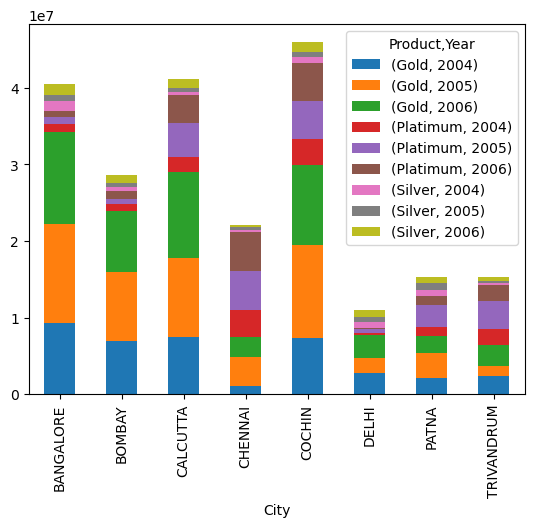

In [1254]:
a2_pivot.plot(kind='bar',stacked=True)
plt.show()

In [1286]:
# 4. Create graphs for
##a. Monthly comparison of total spends, city wise
new1['Monthly_spent']=new1['Month'].apply(lambda x:x.month)

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Spend_Amount,Yearly_spent,Monthly_spent
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004,1
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,2004,1
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,2004,1
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,2004,1
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,2005,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,2004,1
1496,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,5000.00,2004,1
1497,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,5000.50,2004,1
1498,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,5001.00,2004,1


In [1288]:
month_pivot = new1.groupby(['City',new1.Month.dt.month_name()])['Spend_Amount'].sum().reset_index()
month_pivot = month_pivot.pivot_table(index='City',columns=['Month'],values='Spend_Amount')
month_pivot

Month,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,4207980.48,695061.95,422167.24,6734494.76,9041796.84,2228217.69,1330685.90,5362903.07,6383115.13,2260603.07,1091602.61,703018.28
BOMBAY,1873785.01,1066744.75,140040.71,4276988.30,5948993.33,177726.32,1172594.97,5227850.50,3891945.60,2872049.40,676005.70,1278402.79
CALCUTTA,3457507.95,1548354.02,55001.50,8150545.61,9064864.90,2234573.27,2293045.81,4939040.04,5578246.87,2078880.93,196357.83,1511713.57
CHENNAI,2518656.99,305875.97,223628.27,4385815.95,4466961.36,693825.77,1244242.16,3183643.71,2856199.62,1347779.28,156247.17,745759.40
COCHIN,3882744.94,2317306.61,909533.05,5747886.38,11714373.54,1290897.30,2495745.07,5645146.53,6581085.69,3127999.60,868551.89,1382242.90
DELHI,777240.75,155402.16,842342.02,1494064.06,2714261.45,50001.50,511276.09,2267149.02,1600322.07,391610.96,64615.46,50001.00
PATNA,2338179.53,419383.64,50000.00,2353333.55,4916205.55,50000.00,746186.13,1437166.61,2136586.80,413677.87,329537.34,70329.95
TRIVANDRUM,1199293.45,453773.94,640922.26,2857123.89,3704336.99,260484.50,400336.83,2392316.51,2813534.48,143387.40,285581.92,186063.70


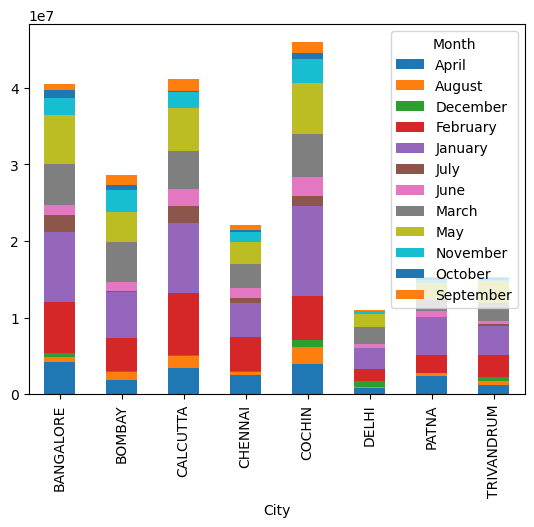

In [1266]:
month_pivot.plot(kind='bar',stacked=True)
plt.show()

In [1274]:
# b .Comparison of yearly spend on air tickets
pd.pivot_table(data=new1[new1.Type=='AIR TICKET'],columns='Yearly_spent',index='Type',values='Spend_Amount',aggfunc='sum')


Yearly_spent,2004,2005,2006
Type,,,
AIR TICKET,4357225.35,10550152.21,5248469.56


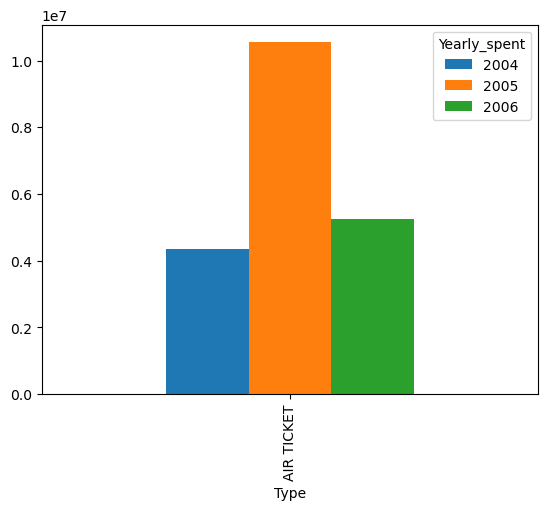

In [1278]:
pd.pivot_table(data=new1[new1.Type=='AIR TICKET'],columns='Yearly_spent',index='Type',values='Spend_Amount',aggfunc='sum').plot(kind='bar')
plt.show()

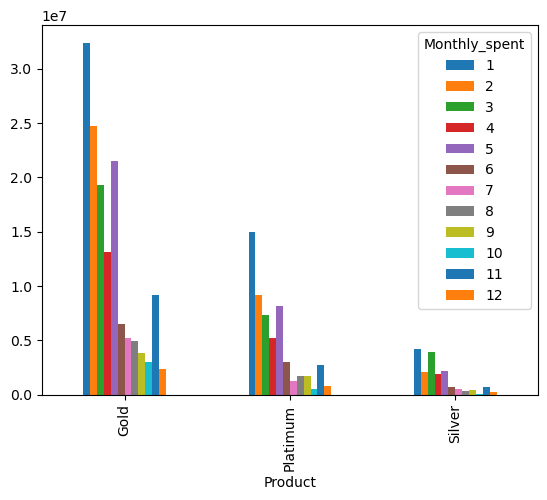

In [1298]:
## c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)
pd.pivot_table(data=new1,index='Product',columns='Monthly_spent',values='Spend_Amount',aggfunc='sum').plot(kind='bar')
plt.show()

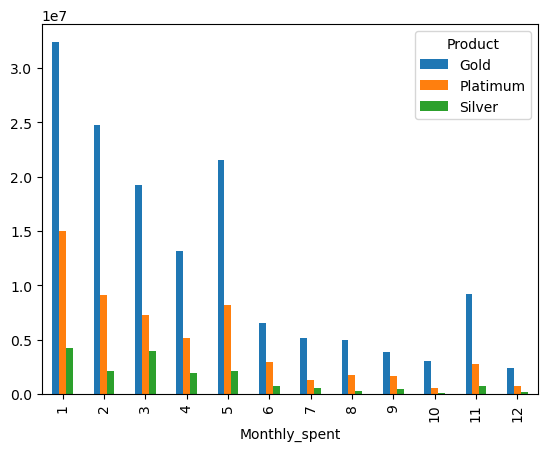

In [1300]:
pd.pivot_table(data=new1,index='Monthly_spent',columns='Product',values='Spend_Amount',aggfunc='sum').plot(kind='bar')
plt.show()

# look for any seasonality that exists in terms of spend

## Yes seasonality exists in spend. if we compare the above two graphs we observe that sales are high for the products during the months JAN, FEB, MAR,
## APRIL, MAY. highest sales are in january